# LispLikeEval.ipynb

* Author: Gen Kuroki
* Date: 2020-10-19
* Repository: https://github.com/genkuroki/LispLikeEval.jl

**Installation**
```
pkg> add https://github.com/genkuroki/LispLikeEval.jl
```

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Examples" data-toc-modified-id="Examples-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Examples</a></span></li><li><span><a href="#Plot-example-of-MetaUtils.@teval" data-toc-modified-id="Plot-example-of-MetaUtils.@teval-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Plot example of MetaUtils.@teval</a></span></li><li><span><a href="#Documents" data-toc-modified-id="Documents-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Documents</a></span></li></ul></div>

In [1]:
if isfile("Project.toml")
    using Pkg
    Pkg.activate(".")
    using Revise
end

 Activating environment at `C:\Users\genkuroki\OneDrive\work\LispLikeEval.jl\Project.toml`


In [2]:
using LispLikeEval
using MetaUtils

┌ Info: Precompiling LispLikeEval [75a861b3-8f1b-477e-b3cd-11ffebdbd227]
└ @ Base loading.jl:1278


## Examples

In [3]:
lexpr = :(lambda((x, y), x+y)(1, 2))
show(lexpr); println("\n")
show_texpr(lexpr); println("\n")

println("|\nV\n")

expr = lexpr2expr(lexpr)
show(expr); println("\n")
show_texpr(expr); println("\n")

@leval lambda((x, y), x+y)(1, 2)

:((lambda((x, y), x + y))(1, 2))

(:call, 
    (:call, :lambda, 
        (:tuple, :x, :y), 
        (:call, :+, :x, :y)), 1, 2)

|
V

:(let
      x = 1
      y = 2
      x + y
  end)

(:let, 
    (:block,), 
    (:block, 
        (:(=), :x, 1), 
        (:(=), :y, 2), 
        (:call, :+, :x, :y)))



3

In [4]:
lexpr = :(lambda((f, x), f(x))(
        lambda(x, cond((iszero(x), 1), (true, x*f(x-1)))),
        10))
show(lexpr); println("\n")
show_texpr(lexpr); println("\n")

println("|\nV\n")

expr = lexpr2expr(lexpr)
show(expr); println("\n")
show_texpr(expr); println("\n")

@leval lambda((f, x), f(x))(
    lambda(x, cond((iszero(x), 1), (true, x*f(x-1)))),
    10)

:((lambda((f, x), f(x)))(lambda(x, cond((iszero(x), 1), (true, x * f(x - 1)))), 10))

(:call, 
    (:call, :lambda, 
        (:tuple, :f, :x), 
        (:call, :f, :x)), 
    (:call, :lambda, :x, 
        (:call, :cond, 
            (:tuple, 
                (:call, :iszero, :x), 1), 
            (:tuple, true, 
                (:call, :*, :x, 
                    (:call, :f, 
                        (:call, :-, :x, 1)))))), 10)

|
V

:(let
      f = (x->if iszero(x)
                  1
              elseif true
                  x * f(x - 1)
              end)
      x = 10
      f(x)
  end)

(:let, 
    (:block,), 
    (:block, 
        (:(=), :f, 
            (:->, :x, 
                (:if, 
                    (:call, :iszero, :x), 
                    (:block, 1), 
                    (:elseif, 
                        (:block, true), 
                        (:block, 
                            (:call, :*, :x, 
                                (:call, :f, 
                       

3628800

In [5]:
@lexpr2expr lambda((assoc, k, v), assoc(k, v))(
    lambda((k, v), cond(
            (eq(v, nil), nil),
            (eq(car(car(v)), k), car(v)), 
            (true, assoc(k, cdr(v))))),
    :Orange,
    (:Apple=>120, :Orange=>210, :Lemmon=>180))

:(let
      assoc = ((k, v)->if eq(v, nil)
                  nil
              elseif eq(car(car(v)), k)
                  car(v)
              elseif true
                  assoc(k, cdr(v))
              end)
      k = :Orange
      v = (:Apple => 120, :Orange => 210, :Lemmon => 180)
      assoc(k, v)
  end)

In [6]:
@leval lambda((assoc, k, v), assoc(k, v))(
    lambda((k, v), cond(
            (eq(v, nil), nil),
            (eq(car(car(v)), k), car(v)), 
            (true, assoc(k, cdr(v))))),
    :Apple,
    (:Apple=>120, :Orange=>210, :Lemmon=>180))

:Apple => 120

In [7]:
@leval lambda((assoc, k, v), assoc(k, v))(
    lambda((k, v), cond(
            (eq(v, nil), nil),
            (eq(car(car(v)), k), car(v)), 
            (true, assoc(k, cdr(v))))),
    :Orange,
    (:Apple=>120, :Orange=>210, :Lemmon=>180))

:Orange => 210

In [8]:
@leval lambda((assoc, k, v), assoc(k, v))(
    lambda((k, v), cond(
            (eq(v, nil), nil),
            (eq(car(car(v)), k), car(v)), 
            (true, assoc(k, cdr(v))))),
    :Lemmon,
    (:Apple=>120, :Orange=>210, :Lemmon=>180))

:Lemmon => 180

In [9]:
@leval lambda((assoc, k, v), assoc(k, v))(
    lambda((k, v), cond(
            (eq(v, nil), nil),
            (eq(car(car(v)), k), car(v)), 
            (true, assoc(k, cdr(v))))),
    :Melon,
    (:Apple=>120, :Orange=>210, :Lemmon=>180))

nil

In [10]:
texpr_exmaple4(x) = (:call, 
    (:lambda, (:tuple, :assoc, :k, :v), (:call, :assoc, :k, :v)), 
    (:lambda, (:tuple, :k, :v), (:cond, 
            (:tuple, (:eq, :v, :nil), :nil), 
            (:tuple, (:eq, (:car, (:car, :v)), :k), (:car, :v)), 
            (:tuple, true, (:call, :assoc, :k, (:cdr, :v))))), 
    QuoteNode(x), 
    :((:Apple=>120, :Orange=>210, :Lemmon=>180)))

texpr_exmaple4 (generic function with 1 method)

In [11]:
texpr_exmaple4(:Apple) |> texpr2expr |> leval

:Apple => 120

In [12]:
texpr_exmaple4(:Orange) |> texpr2expr |> leval

:Orange => 210

In [13]:
texpr_exmaple4(:Lemmon) |> texpr2expr |> leval

:Lemmon => 180

In [14]:
texpr_exmaple4(:Melon) |> texpr2expr |> leval

nil

## Plot example of MetaUtils.@teval

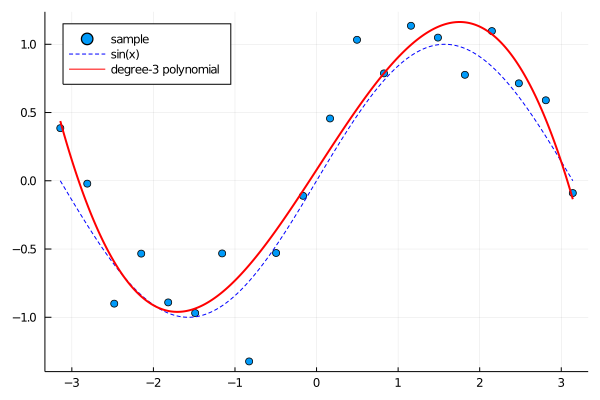

In [15]:
begin
    using Plots
    n = 20
    x = range(-π, π; length=20)
    noise = 0.3randn(n)
    y = sin.(x) + noise
    X = hcat((x.^k for k in 0:3)...)
    b = X\y
    f(x) = sum(b[k+1]*x^k for k in 0:3)
    xs = range(-π, π; length=400)
    plot(; legend=:topleft)
    scatter!(x, y; label="sample")
    plot!(xs, sin.(xs); label="sin(x)", color=:blue, ls=:dash)
    plot!(xs, f.(xs); label="degree-3 polynomial", color=:red, lw=2)
end

In [16]:
@show_texpr begin
    using Plots
    n = 20
    x = range(-π, π; length=20)
    noise = 0.3randn(n)
    y = sin.(x) + noise
    X = hcat((x.^k for k in 0:3)...)
    b = X\y
    f(x) = sum(b[k+1]*x^k for k in 0:3)
    xs = range(-π, π; length=400)
    plot(; legend=:topleft)
    scatter!(x, y; label="sample")
    plot!(xs, sin.(xs); label="sin(x)", color=:blue, ls=:dash)
    plot!(xs, f.(xs); label="degree-3 polynomial", color=:red, lw=2)
end

(:block, 
    (:using, 
        (:., :Plots)), 
    (:(=), :n, 20), 
    (:(=), :x, 
        (:call, :range, 
            (:parameters, 
                (:kw, :length, 20)), 
            (:call, :-, :π), :π)), 
    (:(=), :noise, 
        (:call, :*, 0.3, 
            (:call, :randn, :n))), 
    (:(=), :y, 
        (:call, :+, 
            (:., :sin, 
                (:tuple, :x)), :noise)), 
    (:(=), :X, 
        (:call, :hcat, 
            (:..., 
                (:generator, 
                    (:call, :.^, :x, :k), 
                    (:(=), :k, 
                        (:call, :(:), 0, 3)))))), 
    (:(=), :b, 
        (:call, :\, :X, :y)), 
    (:(=), 
        (:call, :f, :x), 
        (:block, 
            (:call, :sum, 
                (:generator, 
                    (:call, :*, 
                        (:ref, :b, 
                            (:call, :+, :k, 1)), 
                        (:call, :^, :x, :k)), 
                    (:(=), :k, 
                        (:call

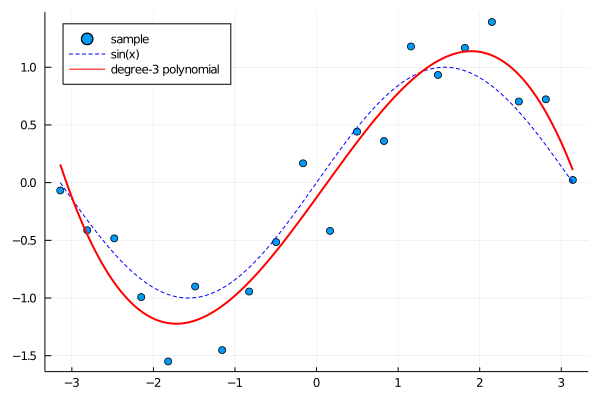

In [17]:
@teval (:block, 
    (:using, (:., :Plots)), 
    (:(=), :n, 20), 
    (:(=), :x, (:range, (:parameters, (:kw, :length, 20)), (:-, :π), :π)), 
    (:(=), :noise, (:*, 0.3, (:randn, :n))), 
    (:(=), :y, (:+, (:., :sin, (:tuple, :x)), :noise)), 
    (:(=), :X, 
        (:hcat, (:..., (:generator, (:call, :.^, :x, :k), (:(=), :k, (:(:), 0, 3)))))), 
    (:(=), :b, (:\, :X, :y)), 
    (:(=), (:call, :f, :x), 
        (:sum, (:generator, (:*, (:ref, :b, (:+, :k, 1)), (:^, :x, :k)), 
            (:(=), :k, (:(:), 0, 3))))), 
    (:(=), :xs, (:range, (:parameters, (:kw, :length, 400)), (:-, :π), :π)), 
    (:plot, (:parameters, (:kw, :legend, QuoteNode(:topleft)))), 
    (:scatter!, (:parameters, (:kw, :label, "sample")), :x, :y), 
    (:plot!, (:parameters, 
            (:kw, :label, "sin(x)"), 
            (:kw, :color, QuoteNode(:blue)), 
            (:kw, :ls, QuoteNode(:dash))), 
        :xs, (:., :sin, (:tuple, :xs))), 
    (:plot!, (:parameters, 
            (:kw, :label, "degree-3 polynomial"), 
            (:kw, :color, QuoteNode(:red)), 
            (:kw, :lw, 2)), 
        :xs, (:., :f, (:tuple, :xs))))

In [18]:
(:block, 
    (:using, (:., :Plots)), 
    (:(=), :n, 20), 
    (:(=), :x, (:range, (:parameters, (:kw, :length, 20)), (:-, :π), :π)), 
    (:(=), :noise, (:*, 0.3, (:randn, :n))), 
    (:(=), :y, (:+, (:., :sin, (:tuple, :x)), :noise)), 
    (:(=), :X, 
        (:hcat, (:..., (:generator, (:call, :.^, :x, :k), (:(=), :k, (:(:), 0, 3)))))), 
    (:(=), :b, (:\, :X, :y)), 
    (:(=), (:call, :f, :x), 
        (:sum, (:generator, (:*, (:ref, :b, (:+, :k, 1)), (:^, :x, :k)), 
            (:(=), :k, (:(:), 0, 3))))), 
    (:(=), :xs, (:range, (:parameters, (:kw, :length, 400)), (:-, :π), :π)), 
    (:plot, (:parameters, (:kw, :legend, QuoteNode(:topleft)))), 
    (:scatter!, (:parameters, (:kw, :label, "sample")), :x, :y), 
    (:plot!, (:parameters, 
            (:kw, :label, "sin(x)"), 
            (:kw, :color, QuoteNode(:blue)), 
            (:kw, :ls, QuoteNode(:dash))), 
        :xs, (:., :sin, (:tuple, :xs))), 
    (:plot!, (:parameters, 
            (:kw, :label, "degree-3 polynomial"), 
            (:kw, :color, QuoteNode(:red)), 
            (:kw, :lw, 2)), 
        :xs, (:., :f, (:tuple, :xs)))) |> texpr2expr |> 
x -> display("text/markdown", "```julia\n$x\n```")

```julia
begin
    using Plots
    n = 20
    x = range(-π, π; length = 20)
    noise = 0.3 * randn(n)
    y = sin.(x) + noise
    X = hcat((x .^ k for k = 0:3)...)
    b = X \ y
    f(x) = sum((b[k + 1] * x ^ k for k = 0:3))
    xs = range(-π, π; length = 400)
    plot(; legend = :topleft)
    scatter!(x, y; label = "sample")
    plot!(xs, sin.(xs); label = "sin(x)", color = :blue, ls = :dash)
    plot!(xs, f.(xs); label = "degree-3 polynomial", color = :red, lw = 2)
end
```

## Documents

In [19]:
@doc lambda

`lambda` is a Lisp-like dummy function to be translated to Julia expression by `lexpr2expr`.

For example, `lambda((x, y), f(x, y))(a, b)` is translated to

```julia
let
    x = a
    y = b
    f(x, y)
end
```

`lambda((x, y), f(x, y))` without arguments (a, b) is translated to

```julia
(x, y) -> f(x, y)
```


In [20]:
@doc cond

`cond` is a Lisp-like dummy function to be translated to Julia expression by `lexpr2expr`.

For example, `cond((a, A), (b, B), (c, C))` is translated to

```julia
if a
    A
elseif b
    B
elseif c
    C
end
```


In [21]:
@doc lexpr2expr

```
lexpr2expr(x)
```

translates a Lisp-like expression `x` to the corresponding Julia expression.


In [22]:
@doc @lexpr2expr

`@lexpr2expr(x)` is the macro version of `lexpr2expr(x)`.


In [23]:
@doc leval

`leval(x, m::Module=Main)` is the function version of `@leval(x)`


In [24]:
@doc @leval

```
@leval x
```

evaluates a Lisp-like expression `x`.


In [25]:
@doc Nil

`Nil` is the type of `nil`.


In [26]:
@doc nil

`nil` is the singleton of type `Nil` regarded as the Lisp-like nil.


In [27]:
@doc null

`null(x)` returns `true` if x is equal to `nil` and `false` otherwise.


In [28]:
@doc eq

`eq(x, y)` returns `true` if x is equal to y and false otherwise, where `()` is considered to be equal to `nil`.


In [29]:
@doc cons

`cons(x, y)` is a Lisp-like cons function.

  * The S-expression (a b c d) is represented by the tuple (a, b, c, d).
  * The S-expression (a b c . d) is represented by the tuple (a, b, c=>d).


In [30]:
@doc car

`car(x, y)` is a Lisp-like car function.


In [31]:
@doc cdr

`cdr(x, y)` is a Lisp-like cdr function.


In [32]:
@doc caar

`caar(x, y)` is a Lisp-like caar function.


In [33]:
@doc cadr

`cadr(x, y)` is a Lisp-like cadr function.


In [34]:
@doc cdar

`cdar(x, y)` is a Lisp-like cdar function.


In [35]:
@doc cddr

`cddr(x, y)` is a Lisp-like cddr function.


In [36]:
@doc list

`list(x...)` is a Lisp-like list function.
